In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import sys
import yaml

SCRIPT_DIR = os.getcwd()
sys.path.append(os.path.dirname(SCRIPT_DIR))
print(SCRIPT_DIR) 

from visualisation_module import *
from helpers import *

path_to_plots = '../plots/'
path_to_results = '../results/'

#EX_CONFIG = load_config(config_path = '../../configs/smosmania_st.yaml')
EX_CONFIG = load_config(config_path = '../../configs/smosmania_st.yaml')

# List of paths to the .nc files
# '/perm/dadf/HSAF_validation/in_situ_data/pre_processed_data/ismn_nc/soil_TERENO_ISMN_2022.nc'
#dir_to_data = "/perm/dadf/HSAF_validation/in_situ_data/pre_processed_data/ismn_nc"
station_name = 'soil_SMOSMANIA_ISMN_2008.nc'
#def update_year(file_name, new_year):
#    return station_name.replace('2008', str(new_year))

#update_year(station_name, '2009')
#print(station_name)
#nc_files = ['soil_SMOSMANIA_ISMN_2008.nc']
#print(nc_files[0])

/etc/ecmwf/nfs/dh1_home_a/pamw/PycharmProjects/forecast-horizons/ecland-emulator/notebooks
Opening ../../configs/smosmania_st.yaml for experiment configuration.


In [2]:
all_stations = ['CabrieresdAvignon', 'Condom', 'CreondArmagnac', 'LaGrandCombe',
       'Lahas', 'LezignanCorbieres', 'Mazan-Abbaye', 'Mejannes-le-Clap',
       'Montaut', 'Mouthoumet', 'Narbonne', 'PeyrusseGrande', 'Pezenas-old',
       'Sabres', 'SaintFelixdeLauragais', 'Savenes', 'Urgons', 'Villevielle']
use_stations = ['Condom', 'Villevielle', 'LaGrandCombe', 'Narbonne', 'Urgons',
                'CabrieresdAvignon', 'Savenes', 'PeyrusseGrande','Sabres', 
                'Mouthoumet','Mejannes-le-Clap',  'CreondArmagnac', 'SaintFelixdeLauragais']
stations_dict = {}
for station in use_stations:
    with open(f"../results/SMOSMANIA_{station}_2022_st_ensemble.yaml", 'r') as f:
        layers = yaml.load(f, Loader=yaml.UnsafeLoader)
    stations_dict[station] = layers

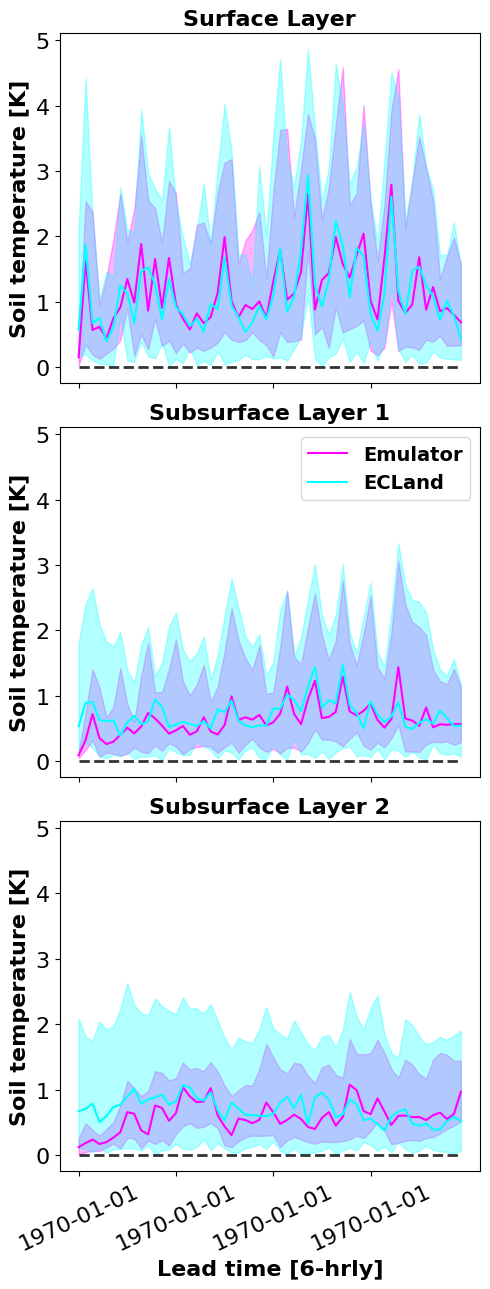

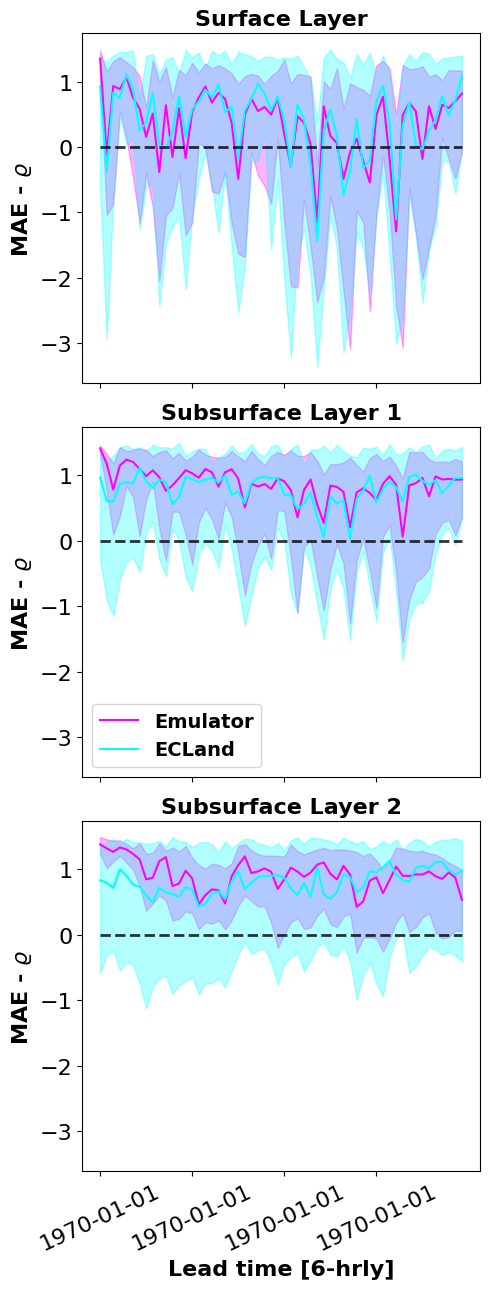

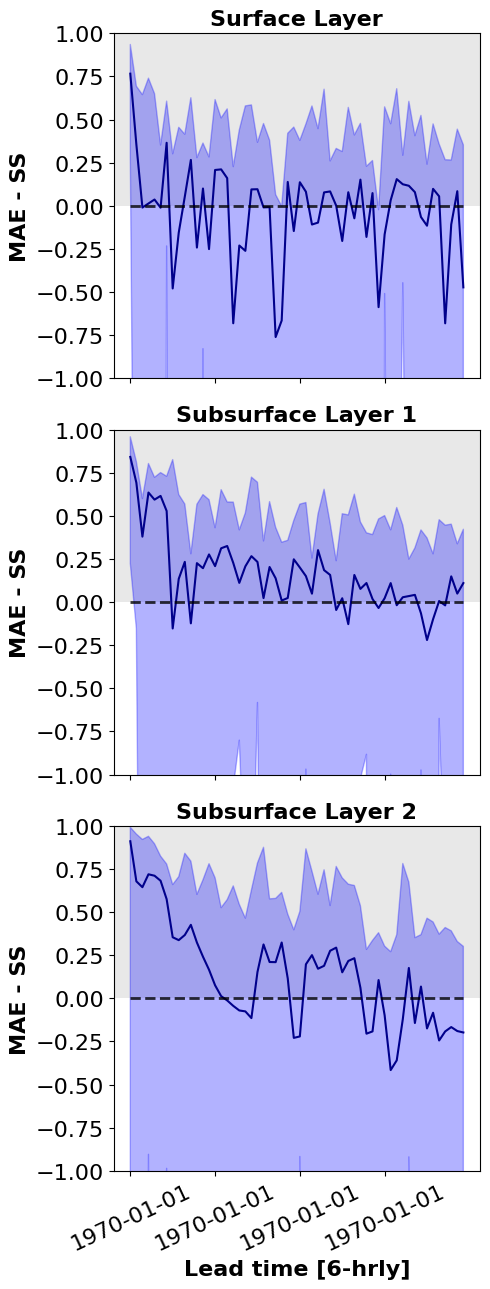

In [3]:
PlotStations = VisualisationMany(
                 network = EX_CONFIG["network"], 
                 station = "all", 
                 variable = EX_CONFIG["variable"], 
                 maximum_leadtime = EX_CONFIG["maximum_leadtime"], 
                 score = EX_CONFIG["score"],
                 doy_vector = None,
                 evaluation = "ens", 
                 path_to_plots = path_to_plots
)

PlotStations.assemble_scores(stations_dict)
PlotStations.plot_scores()
PlotStations.plot_horizons(EX_CONFIG["tolerance"])
PlotStations.plot_skill_scores()

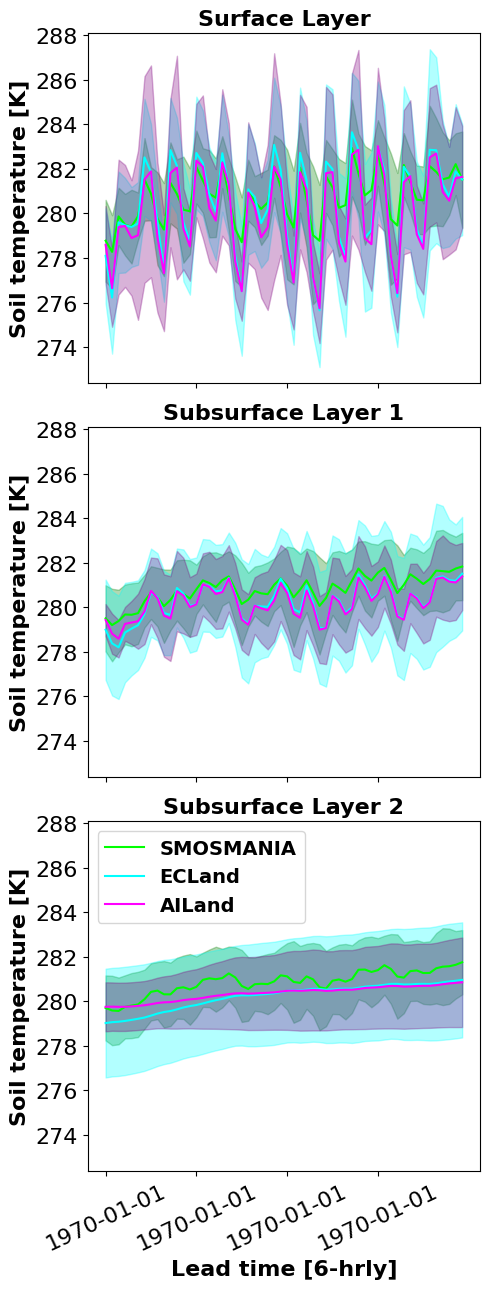

In [4]:
forecast_dict = {}
for station in use_stations[:7]:
    with open(f"../results/SMOSMANIA_{station}_2022_st_ensemble_fc.yaml", 'r') as f:
        layers_fc = yaml.load(f, Loader=yaml.UnsafeLoader)
    forecast_dict[station] = layers_fc

PlotStations.assemble_forecasts(forecast_dict)
PlotStations.plot_forecasts()

In [5]:
observations = []
fc_numerical = []
fc_emulators = []

for station_name, station in forecast_dict.items():

    observations.append(station['layer0']['observations'])
    fc_numerical.append(station['layer0']['fc_numerical'])
    fc_emulators.append(station['layer0']['fc_emulators'])

observations = np.array(observations).squeeze()
fc_numerical = np.array(fc_numerical).squeeze()
fc_emulators = np.array(fc_emulators).squeeze()

print(observations.shape)
print(fc_numerical.shape)
print(fc_emulators.shape)


(7, 56)
(7, 56)
(7, 3, 56)


In [6]:
obs_mean = observations.mean(axis=0).transpose() 
obs_std = observations.std(axis=0).transpose()
num_mean = fc_numerical.mean(axis=0).transpose()
num_std = fc_numerical.std(axis=0).transpose()
em_ens_mean = fc_emulators.mean(axis=1).transpose()
em_ens_std = 4.3*fc_emulators.std(axis=1).transpose()/np.sqrt(3)
em_mean = em_ens_mean.mean(axis=1)
em_std = np.sqrt( (em_ens_std**2).sum(axis=1) / em_ens_std.shape[1]) 

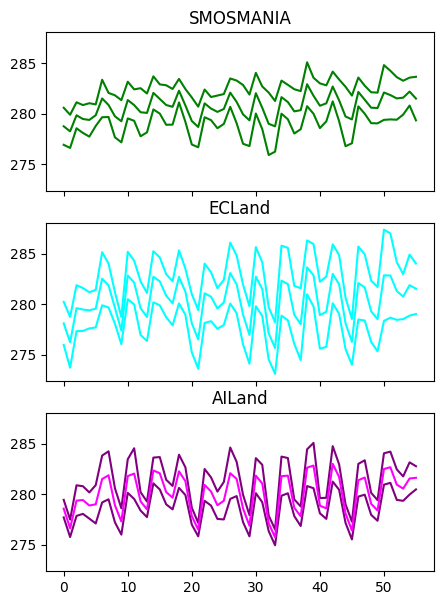

In [7]:


fig, ax = plt.subplots(3, 1, figsize=(5,7), sharex=True, sharey=True) 
ax[0].set_title("SMOSMANIA")
ax[1].set_title("ECLand")
ax[2].set_title("AILand")
ax[0].plot(obs_mean + 2*obs_std, color = "green")
ax[0].plot(obs_mean - 2*obs_std, color = "green")
ax[0].plot(obs_mean, color = "green")
ax[1].plot(num_mean + 2*num_std, color = "cyan")
ax[1].plot(num_mean - 2*num_std, color = "cyan")
ax[1].plot(num_mean, color = "cyan")
ax[2].plot(em_mean + em_std, color = "purple")
ax[2].plot(em_mean - em_std, color = "purple")
ax[2].plot(em_mean, color = "magenta")